In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="RNN seq 2048.", name="epoch 2000")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.SimpleRNN(2048, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=2000, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 2048)              4200448   
                                                                 
 dense (Dense)               (None, 25)                51225     
                                                                 
Total params: 4,251,673
Trainable params: 4,251,673
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/2000
5/5 [==============================] - ETA: 0s - loss: 2.5996 - mae: 1.3653INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 4s 735ms/step - loss: 2.5996 - mae: 1.3653 - val_loss: 9.3753 - val_mae: 2.8874
Epoch 2/2000
5/5 [==============================] - ETA: 0s - loss: 4.5937 - mae: 1.7955INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 672ms/step - loss: 4.5937 - mae: 1.7955 - val_loss: 0.8127 - val_mae: 0.7461
Epoch 3/2000
5/5 [==============================] - 1s 198ms/step - loss: 2.7370 - mae: 1.3826 - val_loss: 3.8378 - val_mae: 1.5387
Epoch 4/2000
5/5 [==============================] - 1s 187ms/step - loss: 5.1664 - mae: 1.9445 - val_loss: 1.0335 - val_mae: 0.8735
Epoch 5/2000
5/5 [==============================] - ETA: 0s - loss: 1.3440 - mae: 0.9784INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 576ms/step - loss: 1.3440 - mae: 0.9784 - val_loss: 0.2800 - val_mae: 0.4292
Epoch 6/2000
5/5 [==============================] - 1s 222ms/step - loss: 0.3064 - mae: 0.4461 - val_loss: 0.3919 - val_mae: 0.5029
Epoch 7/2000
5/5 [==============================] - 1s 193ms/step - loss: 0.3526 - mae: 0.4864 - val_loss: 0.2913 - val_mae: 0.4431
Epoch 8/2000
5/5 [==============================] - ETA: 0s - loss: 0.2806 - mae: 0.4291INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 609ms/step - loss: 0.2806 - mae: 0.4291 - val_loss: 0.2098 - val_mae: 0.3786
Epoch 9/2000
5/5 [==============================] - ETA: 0s - loss: 0.2282 - mae: 0.3925INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 599ms/step - loss: 0.2282 - mae: 0.3925 - val_loss: 0.2093 - val_mae: 0.3808
Epoch 10/2000
5/5 [==============================] - ETA: 0s - loss: 0.2159 - mae: 0.3821INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 570ms/step - loss: 0.2159 - mae: 0.3821 - val_loss: 0.1989 - val_mae: 0.3702
Epoch 11/2000
5/5 [==============================] - ETA: 0s - loss: 0.2027 - mae: 0.3703INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 615ms/step - loss: 0.2027 - mae: 0.3703 - val_loss: 0.1933 - val_mae: 0.3645
Epoch 12/2000
5/5 [==============================] - ETA: 0s - loss: 0.1964 - mae: 0.3668INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 619ms/step - loss: 0.1964 - mae: 0.3668 - val_loss: 0.1871 - val_mae: 0.3624
Epoch 13/2000
5/5 [==============================] - ETA: 0s - loss: 0.1988 - mae: 0.3684INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 639ms/step - loss: 0.1988 - mae: 0.3684 - val_loss: 0.1841 - val_mae: 0.3578
Epoch 14/2000
5/5 [==============================] - ETA: 0s - loss: 0.1979 - mae: 0.3667INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 628ms/step - loss: 0.1979 - mae: 0.3667 - val_loss: 0.1840 - val_mae: 0.3586
Epoch 15/2000
5/5 [==============================] - ETA: 0s - loss: 0.1976 - mae: 0.3679INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 606ms/step - loss: 0.1976 - mae: 0.3679 - val_loss: 0.1796 - val_mae: 0.3560
Epoch 16/2000
5/5 [==============================] - ETA: 0s - loss: 0.1824 - mae: 0.3555INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 696ms/step - loss: 0.1824 - mae: 0.3555 - val_loss: 0.1781 - val_mae: 0.3514
Epoch 17/2000
5/5 [==============================] - 1s 208ms/step - loss: 0.1821 - mae: 0.3530 - val_loss: 0.1789 - val_mae: 0.3558
Epoch 18/2000
5/5 [==============================] - 1s 197ms/step - loss: 0.1861 - mae: 0.3560 - val_loss: 0.1783 - val_mae: 0.3519
Epoch 19/2000
5/5 [==============================] - 1s 191ms/step - loss: 0.1946 - mae: 0.3651 - val_loss: 0.1793 - val_mae: 0.3534
Epoch 20/2000
5/5 [==============================] - 1s 196ms/step - loss: 0.1952 - mae: 0.3644 - val_loss: 0.1873 - val_mae: 0.3586
Epoch 21/2000
5/5 [==============================] - 1s 194ms/step - loss: 0.2088 - mae: 0.3772 - val_loss: 0.1879 - val_mae: 0.3614
Epoch 22/2000
5/5 [==============================] - 1s 195ms/step - loss: 0.1974 - mae: 0.3656 - val_loss: 0.1811 - val_mae: 0.3543
Epoch 23/2000
5/5 [==============================] - 1s 185ms/step - loss: 0.1828 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 591ms/step - loss: 0.1876 - mae: 0.3578 - val_loss: 0.1773 - val_mae: 0.3508
Epoch 26/2000
5/5 [==============================] - ETA: 0s - loss: 0.1830 - mae: 0.3554INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 674ms/step - loss: 0.1830 - mae: 0.3554 - val_loss: 0.1762 - val_mae: 0.3500
Epoch 27/2000
5/5 [==============================] - 1s 210ms/step - loss: 0.1783 - mae: 0.3501 - val_loss: 0.1772 - val_mae: 0.3516
Epoch 28/2000
5/5 [==============================] - ETA: 0s - loss: 0.1800 - mae: 0.3522INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 609ms/step - loss: 0.1800 - mae: 0.3522 - val_loss: 0.1746 - val_mae: 0.3486
Epoch 29/2000
5/5 [==============================] - 1s 192ms/step - loss: 0.1813 - mae: 0.3526 - val_loss: 0.1764 - val_mae: 0.3511
Epoch 30/2000
5/5 [==============================] - 1s 183ms/step - loss: 0.1820 - mae: 0.3540 - val_loss: 0.1803 - val_mae: 0.3564
Epoch 31/2000
5/5 [==============================] - 1s 195ms/step - loss: 0.1908 - mae: 0.3590 - val_loss: 0.1892 - val_mae: 0.3599
Epoch 32/2000
5/5 [==============================] - 1s 185ms/step - loss: 0.1922 - mae: 0.3640 - val_loss: 0.1921 - val_mae: 0.3668
Epoch 33/2000
5/5 [==============================] - 1s 187ms/step - loss: 0.1877 - mae: 0.3593 - val_loss: 0.1777 - val_mae: 0.3495
Epoch 34/2000
5/5 [==============================] - 1s 188ms/step - loss: 0.1821 - mae: 0.3528 - val_loss: 0.1766 - val_mae: 0.3504
Epoch 35/2000
5/5 [==============================] - 1s 183ms/step - loss: 0.1848 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 584ms/step - loss: 0.1983 - mae: 0.3676 - val_loss: 0.1736 - val_mae: 0.3475
Epoch 57/2000
5/5 [==============================] - 1s 214ms/step - loss: 0.1857 - mae: 0.3564 - val_loss: 0.1763 - val_mae: 0.3500
Epoch 58/2000
5/5 [==============================] - ETA: 0s - loss: 0.1759 - mae: 0.3464INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 710ms/step - loss: 0.1759 - mae: 0.3464 - val_loss: 0.1712 - val_mae: 0.3446
Epoch 59/2000
5/5 [==============================] - 1s 217ms/step - loss: 0.1748 - mae: 0.3463 - val_loss: 0.1783 - val_mae: 0.3498
Epoch 60/2000
5/5 [==============================] - 1s 185ms/step - loss: 0.1753 - mae: 0.3474 - val_loss: 0.1736 - val_mae: 0.3461
Epoch 61/2000
5/5 [==============================] - ETA: 0s - loss: 0.1727 - mae: 0.3435INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 651ms/step - loss: 0.1727 - mae: 0.3435 - val_loss: 0.1685 - val_mae: 0.3400
Epoch 62/2000
5/5 [==============================] - 1s 223ms/step - loss: 0.1727 - mae: 0.3458 - val_loss: 0.1724 - val_mae: 0.3479
Epoch 63/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.1712 - mae: 0.3425 - val_loss: 0.1710 - val_mae: 0.3408
Epoch 64/2000
5/5 [==============================] - 1s 185ms/step - loss: 0.1780 - mae: 0.3489 - val_loss: 0.1762 - val_mae: 0.3517
Epoch 65/2000
5/5 [==============================] - 1s 188ms/step - loss: 0.1768 - mae: 0.3463 - val_loss: 0.1823 - val_mae: 0.3519
Epoch 66/2000
5/5 [==============================] - 1s 183ms/step - loss: 0.1768 - mae: 0.3482 - val_loss: 0.1823 - val_mae: 0.3516
Epoch 67/2000
5/5 [==============================] - 1s 187ms/step - loss: 0.1814 - mae: 0.3520 - val_loss: 0.1851 - val_mae: 0.3548
Epoch 68/2000
5/5 [==============================] - 1s 187ms/step - loss: 0.1787 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 567ms/step - loss: 0.1729 - mae: 0.3438 - val_loss: 0.1649 - val_mae: 0.3389
Epoch 72/2000
5/5 [==============================] - 1s 208ms/step - loss: 0.1738 - mae: 0.3441 - val_loss: 0.1927 - val_mae: 0.3666
Epoch 73/2000
5/5 [==============================] - 1s 186ms/step - loss: 0.1853 - mae: 0.3521 - val_loss: 0.1708 - val_mae: 0.3410
Epoch 74/2000
5/5 [==============================] - 1s 186ms/step - loss: 0.1852 - mae: 0.3514 - val_loss: 0.2577 - val_mae: 0.4168
Epoch 75/2000
5/5 [==============================] - 1s 191ms/step - loss: 0.2310 - mae: 0.3975 - val_loss: 0.1845 - val_mae: 0.3533
Epoch 76/2000
5/5 [==============================] - 1s 192ms/step - loss: 0.1931 - mae: 0.3649 - val_loss: 0.1728 - val_mae: 0.3478
Epoch 77/2000
5/5 [==============================] - 1s 186ms/step - loss: 0.1869 - mae: 0.3553 - val_loss: 0.2155 - val_mae: 0.3797
Epoch 78/2000
5/5 [==============================] - 1s 195ms/step - loss: 0.1854 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 631ms/step - loss: 0.1769 - mae: 0.3473 - val_loss: 0.1649 - val_mae: 0.3377
Epoch 81/2000
5/5 [==============================] - 1s 218ms/step - loss: 0.1678 - mae: 0.3405 - val_loss: 0.1866 - val_mae: 0.3601
Epoch 82/2000
5/5 [==============================] - 1s 195ms/step - loss: 0.1965 - mae: 0.3655 - val_loss: 0.1914 - val_mae: 0.3609
Epoch 83/2000
5/5 [==============================] - 1s 201ms/step - loss: 0.1868 - mae: 0.3490 - val_loss: 0.1875 - val_mae: 0.3539
Epoch 84/2000
5/5 [==============================] - 1s 188ms/step - loss: 0.1967 - mae: 0.3657 - val_loss: 0.1905 - val_mae: 0.3584
Epoch 85/2000
5/5 [==============================] - 1s 187ms/step - loss: 0.2010 - mae: 0.3687 - val_loss: 0.1926 - val_mae: 0.3604
Epoch 86/2000
5/5 [==============================] - 1s 185ms/step - loss: 0.1796 - mae: 0.3482 - val_loss: 0.1735 - val_mae: 0.3443
Epoch 87/2000
5/5 [==============================] - 1s 191ms/step - loss: 0.1808 -

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 579ms/step - loss: 0.1721 - mae: 0.3386 - val_loss: 0.1648 - val_mae: 0.3362
Epoch 100/2000
5/5 [==============================] - 1s 222ms/step - loss: 0.1802 - mae: 0.3495 - val_loss: 0.1848 - val_mae: 0.3534
Epoch 101/2000
5/5 [==============================] - 1s 185ms/step - loss: 0.1730 - mae: 0.3426 - val_loss: 0.1668 - val_mae: 0.3402
Epoch 102/2000
5/5 [==============================] - 1s 184ms/step - loss: 0.1741 - mae: 0.3445 - val_loss: 0.2164 - val_mae: 0.3818
Epoch 103/2000
5/5 [==============================] - 1s 184ms/step - loss: 0.1941 - mae: 0.3610 - val_loss: 0.1983 - val_mae: 0.3648
Epoch 104/2000
5/5 [==============================] - 1s 185ms/step - loss: 0.1844 - mae: 0.3506 - val_loss: 0.1655 - val_mae: 0.3322
Epoch 105/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.1841 - mae: 0.3522 - val_loss: 0.1922 - val_mae: 0.3604
Epoch 106/2000
5/5 [==============================] - 1s 184ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 597ms/step - loss: 0.1836 - mae: 0.3468 - val_loss: 0.1603 - val_mae: 0.3295
Epoch 108/2000
5/5 [==============================] - 1s 217ms/step - loss: 0.1797 - mae: 0.3475 - val_loss: 0.2059 - val_mae: 0.3712
Epoch 109/2000
5/5 [==============================] - 1s 183ms/step - loss: 0.2052 - mae: 0.3686 - val_loss: 0.2844 - val_mae: 0.4395
Epoch 110/2000
5/5 [==============================] - 1s 184ms/step - loss: 0.2247 - mae: 0.3876 - val_loss: 0.1706 - val_mae: 0.3384
Epoch 111/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.1818 - mae: 0.3496 - val_loss: 0.2438 - val_mae: 0.3997
Epoch 112/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.2343 - mae: 0.3980 - val_loss: 0.1956 - val_mae: 0.3620
Epoch 113/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.1823 - mae: 0.3504 - val_loss: 0.1903 - val_mae: 0.3536
Epoch 114/2000
5/5 [==============================] - 1s 181ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 573ms/step - loss: 0.1589 - mae: 0.3264 - val_loss: 0.1526 - val_mae: 0.3211
Epoch 117/2000
5/5 [==============================] - 1s 196ms/step - loss: 0.1693 - mae: 0.3397 - val_loss: 0.1706 - val_mae: 0.3379
Epoch 118/2000
5/5 [==============================] - 1s 184ms/step - loss: 0.1630 - mae: 0.3297 - val_loss: 0.1589 - val_mae: 0.3300
Epoch 119/2000
5/5 [==============================] - 1s 183ms/step - loss: 0.1557 - mae: 0.3243 - val_loss: 0.1581 - val_mae: 0.3289
Epoch 120/2000
5/5 [==============================] - 1s 181ms/step - loss: 0.1592 - mae: 0.3299 - val_loss: 0.1764 - val_mae: 0.3446
Epoch 121/2000
5/5 [==============================] - ETA: 0s - loss: 0.1569 - mae: 0.3257INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 567ms/step - loss: 0.1569 - mae: 0.3257 - val_loss: 0.1448 - val_mae: 0.3175
Epoch 122/2000
5/5 [==============================] - 1s 196ms/step - loss: 0.1524 - mae: 0.3210 - val_loss: 0.1749 - val_mae: 0.3409
Epoch 123/2000
5/5 [==============================] - 1s 181ms/step - loss: 0.2040 - mae: 0.3665 - val_loss: 0.2629 - val_mae: 0.4131
Epoch 124/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.2116 - mae: 0.3710 - val_loss: 0.1656 - val_mae: 0.3352
Epoch 125/2000
5/5 [==============================] - 1s 184ms/step - loss: 0.2474 - mae: 0.3990 - val_loss: 0.1741 - val_mae: 0.3441
Epoch 126/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.2431 - mae: 0.3978 - val_loss: 0.2123 - val_mae: 0.3769
Epoch 127/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.1903 - mae: 0.3539 - val_loss: 0.1665 - val_mae: 0.3351
Epoch 128/2000
5/5 [==============================] - 1s 180ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 590ms/step - loss: 0.1466 - mae: 0.3171 - val_loss: 0.1418 - val_mae: 0.3118
Epoch 137/2000
5/5 [==============================] - 1s 216ms/step - loss: 0.1485 - mae: 0.3171 - val_loss: 0.1657 - val_mae: 0.3354
Epoch 138/2000
5/5 [==============================] - ETA: 0s - loss: 0.1700 - mae: 0.3366INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 573ms/step - loss: 0.1700 - mae: 0.3366 - val_loss: 0.1405 - val_mae: 0.3066
Epoch 139/2000
5/5 [==============================] - ETA: 0s - loss: 0.1479 - mae: 0.3139INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 586ms/step - loss: 0.1479 - mae: 0.3139 - val_loss: 0.1383 - val_mae: 0.3038
Epoch 140/2000
5/5 [==============================] - 1s 214ms/step - loss: 0.1452 - mae: 0.3114 - val_loss: 0.1460 - val_mae: 0.3093
Epoch 141/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.1448 - mae: 0.3095 - val_loss: 0.1823 - val_mae: 0.3409
Epoch 142/2000
5/5 [==============================] - ETA: 0s - loss: 0.1598 - mae: 0.3239INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 588ms/step - loss: 0.1598 - mae: 0.3239 - val_loss: 0.1334 - val_mae: 0.2957
Epoch 143/2000
5/5 [==============================] - ETA: 0s - loss: 0.1263 - mae: 0.2890INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 639ms/step - loss: 0.1263 - mae: 0.2890 - val_loss: 0.1270 - val_mae: 0.2906
Epoch 144/2000
5/5 [==============================] - 1s 213ms/step - loss: 0.1265 - mae: 0.2892 - val_loss: 0.1389 - val_mae: 0.3027
Epoch 145/2000
5/5 [==============================] - 1s 181ms/step - loss: 0.1236 - mae: 0.2864 - val_loss: 0.1277 - val_mae: 0.2939
Epoch 146/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.1416 - mae: 0.3043 - val_loss: 0.1468 - val_mae: 0.3131
Epoch 147/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.1366 - mae: 0.3014 - val_loss: 0.1551 - val_mae: 0.3232
Epoch 148/2000
5/5 [==============================] - ETA: 0s - loss: 0.1344 - mae: 0.2957INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 646ms/step - loss: 0.1344 - mae: 0.2957 - val_loss: 0.1199 - val_mae: 0.2837
Epoch 149/2000
5/5 [==============================] - ETA: 0s - loss: 0.1098 - mae: 0.2673INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 610ms/step - loss: 0.1098 - mae: 0.2673 - val_loss: 0.1062 - val_mae: 0.2654
Epoch 150/2000
5/5 [==============================] - ETA: 0s - loss: 0.1153 - mae: 0.2749INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 630ms/step - loss: 0.1153 - mae: 0.2749 - val_loss: 0.1038 - val_mae: 0.2602
Epoch 151/2000
5/5 [==============================] - ETA: 0s - loss: 0.1197 - mae: 0.2784INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 630ms/step - loss: 0.1197 - mae: 0.2784 - val_loss: 0.0963 - val_mae: 0.2483
Epoch 152/2000
5/5 [==============================] - ETA: 0s - loss: 0.0985 - mae: 0.2548INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 668ms/step - loss: 0.0985 - mae: 0.2548 - val_loss: 0.0901 - val_mae: 0.2433
Epoch 153/2000
5/5 [==============================] - 1s 216ms/step - loss: 0.0990 - mae: 0.2540 - val_loss: 0.0970 - val_mae: 0.2513
Epoch 154/2000
5/5 [==============================] - 1s 181ms/step - loss: 0.1050 - mae: 0.2590 - val_loss: 0.0915 - val_mae: 0.2417
Epoch 155/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.0947 - mae: 0.2450 - val_loss: 0.0972 - val_mae: 0.2474
Epoch 156/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.0985 - mae: 0.2515 - val_loss: 0.1049 - val_mae: 0.2631
Epoch 157/2000
5/5 [==============================] - ETA: 0s - loss: 0.1100 - mae: 0.2676INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 3s 623ms/step - loss: 0.1100 - mae: 0.2676 - val_loss: 0.0900 - val_mae: 0.2420
Epoch 158/2000
5/5 [==============================] - 1s 217ms/step - loss: 0.1008 - mae: 0.2541 - val_loss: 0.1215 - val_mae: 0.2805
Epoch 159/2000
5/5 [==============================] - 1s 181ms/step - loss: 0.1127 - mae: 0.2707 - val_loss: 0.0946 - val_mae: 0.2481
Epoch 160/2000
5/5 [==============================] - 1s 184ms/step - loss: 0.0943 - mae: 0.2467 - val_loss: 0.0998 - val_mae: 0.2531
Epoch 161/2000
5/5 [==============================] - 1s 184ms/step - loss: 0.1018 - mae: 0.2525 - val_loss: 0.0930 - val_mae: 0.2395
Epoch 162/2000
5/5 [==============================] - ETA: 0s - loss: 0.0900 - mae: 0.2366INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 569ms/step - loss: 0.0900 - mae: 0.2366 - val_loss: 0.0859 - val_mae: 0.2284
Epoch 163/2000
5/5 [==============================] - 1s 209ms/step - loss: 0.0850 - mae: 0.2290 - val_loss: 0.0915 - val_mae: 0.2418
Epoch 164/2000
5/5 [==============================] - 1s 184ms/step - loss: 0.0950 - mae: 0.2443 - val_loss: 0.1123 - val_mae: 0.2638
Epoch 165/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.0972 - mae: 0.2469 - val_loss: 0.1176 - val_mae: 0.2697
Epoch 166/2000
5/5 [==============================] - ETA: 0s - loss: 0.1008 - mae: 0.2502INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 588ms/step - loss: 0.1008 - mae: 0.2502 - val_loss: 0.0733 - val_mae: 0.2110
Epoch 167/2000
5/5 [==============================] - 1s 211ms/step - loss: 0.0962 - mae: 0.2447 - val_loss: 0.1280 - val_mae: 0.2900
Epoch 168/2000
5/5 [==============================] - 1s 183ms/step - loss: 0.1195 - mae: 0.2780 - val_loss: 0.0857 - val_mae: 0.2278
Epoch 169/2000
5/5 [==============================] - 1s 183ms/step - loss: 0.1054 - mae: 0.2567 - val_loss: 0.1203 - val_mae: 0.2712
Epoch 170/2000
5/5 [==============================] - 1s 184ms/step - loss: 0.0944 - mae: 0.2436 - val_loss: 0.1197 - val_mae: 0.2729
Epoch 171/2000
5/5 [==============================] - 1s 184ms/step - loss: 0.0947 - mae: 0.2441 - val_loss: 0.0849 - val_mae: 0.2285
Epoch 172/2000
5/5 [==============================] - ETA: 0s - loss: 0.0830 - mae: 0.2263INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 589ms/step - loss: 0.0830 - mae: 0.2263 - val_loss: 0.0708 - val_mae: 0.2100
Epoch 173/2000
5/5 [==============================] - 1s 202ms/step - loss: 0.0794 - mae: 0.2227 - val_loss: 0.0773 - val_mae: 0.2179
Epoch 174/2000
5/5 [==============================] - 1s 183ms/step - loss: 0.0813 - mae: 0.2238 - val_loss: 0.0787 - val_mae: 0.2202
Epoch 175/2000
5/5 [==============================] - 1s 183ms/step - loss: 0.0846 - mae: 0.2290 - val_loss: 0.0756 - val_mae: 0.2201
Epoch 176/2000
5/5 [==============================] - 1s 181ms/step - loss: 0.0806 - mae: 0.2215 - val_loss: 0.0742 - val_mae: 0.2190
Epoch 177/2000
5/5 [==============================] - 1s 186ms/step - loss: 0.0751 - mae: 0.2156 - val_loss: 0.0876 - val_mae: 0.2341
Epoch 178/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.0803 - mae: 0.2241 - val_loss: 0.0739 - val_mae: 0.2114
Epoch 179/2000
5/5 [==============================] - 1s 181ms/step - loss: 0

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 577ms/step - loss: 0.0759 - mae: 0.2174 - val_loss: 0.0671 - val_mae: 0.2001
Epoch 196/2000
5/5 [==============================] - 1s 221ms/step - loss: 0.0767 - mae: 0.2193 - val_loss: 0.0805 - val_mae: 0.2316
Epoch 197/2000
5/5 [==============================] - 1s 185ms/step - loss: 0.0871 - mae: 0.2325 - val_loss: 0.0738 - val_mae: 0.2194
Epoch 198/2000
5/5 [==============================] - ETA: 0s - loss: 0.0790 - mae: 0.2209INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_203603-2lka09qu\files\model-best)... Done. 0.1s


5/5 [==============================] - 2s 564ms/step - loss: 0.0790 - mae: 0.2209 - val_loss: 0.0649 - val_mae: 0.1977
Epoch 199/2000
5/5 [==============================] - 1s 211ms/step - loss: 0.0740 - mae: 0.2120 - val_loss: 0.0837 - val_mae: 0.2247
Epoch 200/2000
5/5 [==============================] - 1s 190ms/step - loss: 0.0766 - mae: 0.2165 - val_loss: 0.0807 - val_mae: 0.2192
Epoch 201/2000
5/5 [==============================] - 1s 183ms/step - loss: 0.0770 - mae: 0.2187 - val_loss: 0.0723 - val_mae: 0.2114
Epoch 202/2000
5/5 [==============================] - 1s 176ms/step - loss: 0.0791 - mae: 0.2213 - val_loss: 0.0717 - val_mae: 0.2116
Epoch 203/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.0767 - mae: 0.2190 - val_loss: 0.0681 - val_mae: 0.2015
Epoch 204/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.0713 - mae: 0.2080 - val_loss: 0.0807 - val_mae: 0.2189
Epoch 205/2000
5/5 [==============================] - 1s 181ms/step - loss: 0

5/5 [==============================] - 1s 177ms/step - loss: 0.0773 - mae: 0.2180 - val_loss: 0.0660 - val_mae: 0.1995
Epoch 260/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.0727 - mae: 0.2106 - val_loss: 0.0791 - val_mae: 0.2205
Epoch 261/2000
5/5 [==============================] - 1s 177ms/step - loss: 0.0766 - mae: 0.2177 - val_loss: 0.0723 - val_mae: 0.2079
Epoch 262/2000
5/5 [==============================] - 1s 183ms/step - loss: 0.0751 - mae: 0.2143 - val_loss: 0.0762 - val_mae: 0.2207
Epoch 263/2000
5/5 [==============================] - 1s 184ms/step - loss: 0.0804 - mae: 0.2256 - val_loss: 0.0763 - val_mae: 0.2202
Epoch 264/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.0755 - mae: 0.2162 - val_loss: 0.1010 - val_mae: 0.2504
Epoch 265/2000
5/5 [==============================] - 1s 181ms/step - loss: 0.0836 - mae: 0.2285 - val_loss: 0.0828 - val_mae: 0.2229
Epoch 266/2000
5/5 [==============================] - 1s 185ms/step - loss: 0

5/5 [==============================] - 1s 179ms/step - loss: 0.0733 - mae: 0.2130 - val_loss: 0.0761 - val_mae: 0.2098
Epoch 321/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.0722 - mae: 0.2099 - val_loss: 0.0840 - val_mae: 0.2288
Epoch 322/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.0888 - mae: 0.2363 - val_loss: 0.0768 - val_mae: 0.2202
Epoch 323/2000
5/5 [==============================] - 1s 181ms/step - loss: 0.0893 - mae: 0.2343 - val_loss: 0.0893 - val_mae: 0.2326
Epoch 324/2000
5/5 [==============================] - 1s 185ms/step - loss: 0.0861 - mae: 0.2304 - val_loss: 0.0770 - val_mae: 0.2170
Epoch 325/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.0840 - mae: 0.2261 - val_loss: 0.0951 - val_mae: 0.2401
Epoch 326/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.0844 - mae: 0.2292 - val_loss: 0.1171 - val_mae: 0.2673
Epoch 327/2000
5/5 [==============================] - 1s 184ms/step - loss: 0

5/5 [==============================] - 1s 181ms/step - loss: 0.0734 - mae: 0.2123 - val_loss: 0.0738 - val_mae: 0.2118
Epoch 382/2000
5/5 [==============================] - 1s 177ms/step - loss: 0.0707 - mae: 0.2075 - val_loss: 0.0689 - val_mae: 0.2054
Epoch 383/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.0742 - mae: 0.2143 - val_loss: 0.1046 - val_mae: 0.2547
Epoch 384/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.0873 - mae: 0.2330 - val_loss: 0.0756 - val_mae: 0.2164
Epoch 385/2000
5/5 [==============================] - 1s 181ms/step - loss: 0.0795 - mae: 0.2231 - val_loss: 0.0793 - val_mae: 0.2175
Epoch 386/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.0842 - mae: 0.2283 - val_loss: 0.0736 - val_mae: 0.2149
Epoch 387/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.0729 - mae: 0.2122 - val_loss: 0.0765 - val_mae: 0.2222
Epoch 388/2000
5/5 [==============================] - 1s 181ms/step - loss: 0

5/5 [==============================] - 1s 182ms/step - loss: 0.0912 - mae: 0.2380 - val_loss: 0.0791 - val_mae: 0.2201
Epoch 443/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.0831 - mae: 0.2267 - val_loss: 0.0822 - val_mae: 0.2254
Epoch 444/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.0795 - mae: 0.2218 - val_loss: 0.0729 - val_mae: 0.2090
Epoch 445/2000
5/5 [==============================] - 1s 181ms/step - loss: 0.0792 - mae: 0.2213 - val_loss: 0.0745 - val_mae: 0.2118
Epoch 446/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.0765 - mae: 0.2181 - val_loss: 0.0824 - val_mae: 0.2275
Epoch 447/2000
5/5 [==============================] - 1s 183ms/step - loss: 0.0783 - mae: 0.2218 - val_loss: 0.0736 - val_mae: 0.2175
Epoch 448/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.0831 - mae: 0.2291 - val_loss: 0.1027 - val_mae: 0.2532
Epoch 449/2000
5/5 [==============================] - 1s 179ms/step - loss: 0

5/5 [==============================] - 1s 178ms/step - loss: 0.1435 - mae: 0.2988 - val_loss: 0.1192 - val_mae: 0.2726
Epoch 504/2000
5/5 [==============================] - 1s 176ms/step - loss: 0.1223 - mae: 0.2774 - val_loss: 0.1120 - val_mae: 0.2752
Epoch 505/2000
5/5 [==============================] - 1s 177ms/step - loss: 0.1177 - mae: 0.2752 - val_loss: 0.1233 - val_mae: 0.2801
Epoch 506/2000
5/5 [==============================] - 1s 177ms/step - loss: 0.1073 - mae: 0.2576 - val_loss: 0.1030 - val_mae: 0.2590
Epoch 507/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.0911 - mae: 0.2355 - val_loss: 0.1015 - val_mae: 0.2581
Epoch 508/2000
5/5 [==============================] - 1s 181ms/step - loss: 0.1226 - mae: 0.2787 - val_loss: 0.1429 - val_mae: 0.3096
Epoch 509/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.1059 - mae: 0.2594 - val_loss: 0.1094 - val_mae: 0.2699
Epoch 510/2000
5/5 [==============================] - 1s 180ms/step - loss: 0

5/5 [==============================] - 1s 177ms/step - loss: 0.0970 - mae: 0.2445 - val_loss: 0.0952 - val_mae: 0.2494
Epoch 565/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.1019 - mae: 0.2553 - val_loss: 0.0756 - val_mae: 0.2145
Epoch 566/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.0899 - mae: 0.2328 - val_loss: 0.0956 - val_mae: 0.2400
Epoch 567/2000
5/5 [==============================] - 1s 185ms/step - loss: 0.0890 - mae: 0.2353 - val_loss: 0.1552 - val_mae: 0.3204
Epoch 568/2000
5/5 [==============================] - 1s 185ms/step - loss: 0.1231 - mae: 0.2828 - val_loss: 0.1510 - val_mae: 0.3280
Epoch 569/2000
5/5 [==============================] - 1s 186ms/step - loss: 0.1334 - mae: 0.2932 - val_loss: 0.2864 - val_mae: 0.4560
Epoch 570/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.2054 - mae: 0.3703 - val_loss: 0.7211 - val_mae: 0.7643
Epoch 571/2000
5/5 [==============================] - 1s 180ms/step - loss: 0

5/5 [==============================] - 1s 176ms/step - loss: 0.1817 - mae: 0.3500 - val_loss: 0.1495 - val_mae: 0.3172
Epoch 626/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.1575 - mae: 0.3220 - val_loss: 0.1689 - val_mae: 0.3293
Epoch 627/2000
5/5 [==============================] - 1s 181ms/step - loss: 0.1790 - mae: 0.3433 - val_loss: 0.1433 - val_mae: 0.3128
Epoch 628/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.1899 - mae: 0.3477 - val_loss: 0.3709 - val_mae: 0.5129
Epoch 629/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.2442 - mae: 0.4008 - val_loss: 0.1476 - val_mae: 0.3165
Epoch 630/2000
5/5 [==============================] - 1s 188ms/step - loss: 0.1517 - mae: 0.3147 - val_loss: 0.1342 - val_mae: 0.3028
Epoch 631/2000
5/5 [==============================] - 1s 190ms/step - loss: 0.1454 - mae: 0.3093 - val_loss: 0.1227 - val_mae: 0.2837
Epoch 632/2000
5/5 [==============================] - 1s 190ms/step - loss: 0

5/5 [==============================] - 1s 177ms/step - loss: 0.2052 - mae: 0.3663 - val_loss: 0.2692 - val_mae: 0.4188
Epoch 687/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.2383 - mae: 0.3950 - val_loss: 0.2679 - val_mae: 0.4206
Epoch 688/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.2506 - mae: 0.4074 - val_loss: 0.1607 - val_mae: 0.3328
Epoch 689/2000
5/5 [==============================] - 1s 183ms/step - loss: 0.1785 - mae: 0.3464 - val_loss: 0.1746 - val_mae: 0.3434
Epoch 690/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.1847 - mae: 0.3495 - val_loss: 0.1755 - val_mae: 0.3451
Epoch 691/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.1621 - mae: 0.3274 - val_loss: 0.1417 - val_mae: 0.3069
Epoch 692/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.2142 - mae: 0.3755 - val_loss: 0.3716 - val_mae: 0.5169
Epoch 693/2000
5/5 [==============================] - 1s 180ms/step - loss: 0

5/5 [==============================] - 1s 181ms/step - loss: 0.1619 - mae: 0.3272 - val_loss: 0.1873 - val_mae: 0.3603
Epoch 748/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.1534 - mae: 0.3192 - val_loss: 0.2188 - val_mae: 0.3906
Epoch 749/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.1876 - mae: 0.3468 - val_loss: 0.1700 - val_mae: 0.3361
Epoch 750/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.2020 - mae: 0.3594 - val_loss: 0.3128 - val_mae: 0.4593
Epoch 751/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.2647 - mae: 0.4177 - val_loss: 0.2231 - val_mae: 0.3878
Epoch 752/2000
5/5 [==============================] - 1s 181ms/step - loss: 0.2470 - mae: 0.4042 - val_loss: 0.3992 - val_mae: 0.5273
Epoch 753/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.2543 - mae: 0.4019 - val_loss: 0.2173 - val_mae: 0.3813
Epoch 754/2000
5/5 [==============================] - 1s 179ms/step - loss: 0

5/5 [==============================] - 1s 178ms/step - loss: 0.1534 - mae: 0.3171 - val_loss: 0.1130 - val_mae: 0.2734
Epoch 809/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.1431 - mae: 0.3079 - val_loss: 0.1506 - val_mae: 0.3139
Epoch 810/2000
5/5 [==============================] - 1s 185ms/step - loss: 0.1347 - mae: 0.2959 - val_loss: 0.0993 - val_mae: 0.2518
Epoch 811/2000
5/5 [==============================] - 1s 185ms/step - loss: 0.1103 - mae: 0.2665 - val_loss: 0.0837 - val_mae: 0.2279
Epoch 812/2000
5/5 [==============================] - 1s 176ms/step - loss: 0.1047 - mae: 0.2580 - val_loss: 0.1122 - val_mae: 0.2695
Epoch 813/2000
5/5 [==============================] - 1s 183ms/step - loss: 0.0988 - mae: 0.2465 - val_loss: 0.0910 - val_mae: 0.2375
Epoch 814/2000
5/5 [==============================] - 1s 183ms/step - loss: 0.1020 - mae: 0.2550 - val_loss: 0.1203 - val_mae: 0.2834
Epoch 815/2000
5/5 [==============================] - 1s 177ms/step - loss: 0

5/5 [==============================] - 1s 180ms/step - loss: 0.1935 - mae: 0.3581 - val_loss: 0.1963 - val_mae: 0.3646
Epoch 870/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.2001 - mae: 0.3638 - val_loss: 0.2390 - val_mae: 0.4007
Epoch 871/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.1761 - mae: 0.3434 - val_loss: 0.1764 - val_mae: 0.3397
Epoch 872/2000
5/5 [==============================] - 1s 177ms/step - loss: 0.1767 - mae: 0.3424 - val_loss: 0.1523 - val_mae: 0.3217
Epoch 873/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.1748 - mae: 0.3412 - val_loss: 0.1954 - val_mae: 0.3596
Epoch 874/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.1625 - mae: 0.3289 - val_loss: 0.2153 - val_mae: 0.3806
Epoch 875/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.2209 - mae: 0.3810 - val_loss: 0.1876 - val_mae: 0.3576
Epoch 876/2000
5/5 [==============================] - 1s 183ms/step - loss: 0

5/5 [==============================] - 1s 183ms/step - loss: 0.1180 - mae: 0.2775 - val_loss: 0.1476 - val_mae: 0.3138
Epoch 931/2000
5/5 [==============================] - 1s 177ms/step - loss: 0.1548 - mae: 0.3202 - val_loss: 0.1298 - val_mae: 0.2918
Epoch 932/2000
5/5 [==============================] - 1s 183ms/step - loss: 0.1204 - mae: 0.2802 - val_loss: 0.1431 - val_mae: 0.3062
Epoch 933/2000
5/5 [==============================] - 1s 183ms/step - loss: 0.1388 - mae: 0.2989 - val_loss: 0.2464 - val_mae: 0.4183
Epoch 934/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.1657 - mae: 0.3240 - val_loss: 0.1516 - val_mae: 0.3188
Epoch 935/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.1683 - mae: 0.3297 - val_loss: 0.1363 - val_mae: 0.2990
Epoch 936/2000
5/5 [==============================] - 1s 177ms/step - loss: 0.1713 - mae: 0.3369 - val_loss: 0.1505 - val_mae: 0.3177
Epoch 937/2000
5/5 [==============================] - 1s 177ms/step - loss: 0

5/5 [==============================] - 1s 178ms/step - loss: 0.1302 - mae: 0.2724 - val_loss: 0.1000 - val_mae: 0.2527
Epoch 992/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.1162 - mae: 0.2530 - val_loss: 0.1062 - val_mae: 0.2539
Epoch 993/2000
5/5 [==============================] - 1s 185ms/step - loss: 0.1335 - mae: 0.2694 - val_loss: 0.1305 - val_mae: 0.2986
Epoch 994/2000
5/5 [==============================] - 1s 183ms/step - loss: 0.1597 - mae: 0.2990 - val_loss: 0.0941 - val_mae: 0.2423
Epoch 995/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.1712 - mae: 0.3141 - val_loss: 0.2785 - val_mae: 0.4542
Epoch 996/2000
5/5 [==============================] - 1s 184ms/step - loss: 0.2020 - mae: 0.3529 - val_loss: 0.1322 - val_mae: 0.2968
Epoch 997/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.1682 - mae: 0.3045 - val_loss: 0.0969 - val_mae: 0.2445
Epoch 998/2000
5/5 [==============================] - 1s 181ms/step - loss: 0

Epoch 1052/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.2866 - mae: 0.4237 - val_loss: 0.1900 - val_mae: 0.3600
Epoch 1053/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.2247 - mae: 0.3703 - val_loss: 0.2777 - val_mae: 0.4343
Epoch 1054/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.2494 - mae: 0.3968 - val_loss: 0.2640 - val_mae: 0.4242
Epoch 1055/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.2680 - mae: 0.4052 - val_loss: 0.1975 - val_mae: 0.3637
Epoch 1056/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.2280 - mae: 0.3761 - val_loss: 0.1929 - val_mae: 0.3625
Epoch 1057/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.2307 - mae: 0.3700 - val_loss: 0.1486 - val_mae: 0.3218
Epoch 1058/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.1927 - mae: 0.3409 - val_loss: 0.1588 - val_mae: 0.3299
Epoch 1059/2000
5/5 [==============================] - 

Epoch 1113/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.1619 - mae: 0.3019 - val_loss: 0.0977 - val_mae: 0.2477
Epoch 1114/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.2567 - mae: 0.3950 - val_loss: 0.1570 - val_mae: 0.3188
Epoch 1115/2000
5/5 [==============================] - 1s 181ms/step - loss: 0.1739 - mae: 0.3115 - val_loss: 0.1277 - val_mae: 0.2900
Epoch 1116/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.1717 - mae: 0.3141 - val_loss: 0.1407 - val_mae: 0.3025
Epoch 1117/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.1466 - mae: 0.3020 - val_loss: 0.1609 - val_mae: 0.3292
Epoch 1118/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.1993 - mae: 0.3278 - val_loss: 0.2210 - val_mae: 0.3810
Epoch 1119/2000
5/5 [==============================] - 1s 181ms/step - loss: 0.1832 - mae: 0.3391 - val_loss: 0.1384 - val_mae: 0.3029
Epoch 1120/2000
5/5 [==============================] - 

Epoch 1174/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.1766 - mae: 0.3267 - val_loss: 0.1863 - val_mae: 0.3556
Epoch 1175/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.1600 - mae: 0.2951 - val_loss: 0.1240 - val_mae: 0.2832
Epoch 1176/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.1448 - mae: 0.2729 - val_loss: 0.1142 - val_mae: 0.2729
Epoch 1177/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.2000 - mae: 0.3525 - val_loss: 0.1230 - val_mae: 0.2741
Epoch 1178/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.1599 - mae: 0.3053 - val_loss: 0.1410 - val_mae: 0.3046
Epoch 1179/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.2147 - mae: 0.3470 - val_loss: 0.1418 - val_mae: 0.3025
Epoch 1180/2000
5/5 [==============================] - 1s 177ms/step - loss: 0.2024 - mae: 0.3609 - val_loss: 0.1436 - val_mae: 0.3094
Epoch 1181/2000
5/5 [==============================] - 

Epoch 1235/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.1522 - mae: 0.3066 - val_loss: 0.1311 - val_mae: 0.2974
Epoch 1236/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.1443 - mae: 0.2918 - val_loss: 0.1513 - val_mae: 0.3174
Epoch 1237/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.1777 - mae: 0.3368 - val_loss: 0.1716 - val_mae: 0.3345
Epoch 1238/2000
5/5 [==============================] - 1s 173ms/step - loss: 0.1575 - mae: 0.3168 - val_loss: 0.1381 - val_mae: 0.3073
Epoch 1239/2000
5/5 [==============================] - 1s 175ms/step - loss: 0.1521 - mae: 0.3040 - val_loss: 0.1364 - val_mae: 0.2998
Epoch 1240/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.1397 - mae: 0.2908 - val_loss: 0.1502 - val_mae: 0.3162
Epoch 1241/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.1478 - mae: 0.3060 - val_loss: 0.1503 - val_mae: 0.3133
Epoch 1242/2000
5/5 [==============================] - 

Epoch 1296/2000
5/5 [==============================] - 1s 175ms/step - loss: 0.1337 - mae: 0.2936 - val_loss: 0.1739 - val_mae: 0.3396
Epoch 1297/2000
5/5 [==============================] - 1s 174ms/step - loss: 0.1442 - mae: 0.3064 - val_loss: 0.1382 - val_mae: 0.3004
Epoch 1298/2000
5/5 [==============================] - 1s 175ms/step - loss: 0.1264 - mae: 0.2887 - val_loss: 0.1915 - val_mae: 0.3439
Epoch 1299/2000
5/5 [==============================] - 1s 176ms/step - loss: 0.1521 - mae: 0.3125 - val_loss: 0.1509 - val_mae: 0.3192
Epoch 1300/2000
5/5 [==============================] - 1s 174ms/step - loss: 0.1285 - mae: 0.2938 - val_loss: 0.1408 - val_mae: 0.3073
Epoch 1301/2000
5/5 [==============================] - 1s 176ms/step - loss: 0.1217 - mae: 0.2813 - val_loss: 0.1357 - val_mae: 0.2969
Epoch 1302/2000
5/5 [==============================] - 1s 174ms/step - loss: 0.1228 - mae: 0.2863 - val_loss: 0.1453 - val_mae: 0.3079
Epoch 1303/2000
5/5 [==============================] - 

Epoch 1357/2000
5/5 [==============================] - 1s 177ms/step - loss: 0.1366 - mae: 0.2939 - val_loss: 0.1257 - val_mae: 0.2902
Epoch 1358/2000
5/5 [==============================] - 1s 175ms/step - loss: 0.1251 - mae: 0.2869 - val_loss: 0.1287 - val_mae: 0.2928
Epoch 1359/2000
5/5 [==============================] - 1s 175ms/step - loss: 0.1245 - mae: 0.2872 - val_loss: 0.1316 - val_mae: 0.3003
Epoch 1360/2000
5/5 [==============================] - 1s 173ms/step - loss: 0.1281 - mae: 0.2933 - val_loss: 0.1556 - val_mae: 0.3083
Epoch 1361/2000
5/5 [==============================] - 1s 176ms/step - loss: 0.1445 - mae: 0.3051 - val_loss: 0.1371 - val_mae: 0.3001
Epoch 1362/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.1276 - mae: 0.2907 - val_loss: 0.1344 - val_mae: 0.3001
Epoch 1363/2000
5/5 [==============================] - 1s 175ms/step - loss: 0.1261 - mae: 0.2884 - val_loss: 0.1229 - val_mae: 0.2856
Epoch 1364/2000
5/5 [==============================] - 

Epoch 1418/2000
5/5 [==============================] - 1s 220ms/step - loss: 0.1322 - mae: 0.2926 - val_loss: 0.1274 - val_mae: 0.2837
Epoch 1419/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.1307 - mae: 0.2892 - val_loss: 0.1499 - val_mae: 0.3169
Epoch 1420/2000
5/5 [==============================] - 1s 177ms/step - loss: 0.1417 - mae: 0.3009 - val_loss: 0.1602 - val_mae: 0.3217
Epoch 1421/2000
5/5 [==============================] - 1s 177ms/step - loss: 0.1377 - mae: 0.3001 - val_loss: 0.1217 - val_mae: 0.2847
Epoch 1422/2000
5/5 [==============================] - 1s 176ms/step - loss: 0.1269 - mae: 0.2878 - val_loss: 0.1445 - val_mae: 0.3050
Epoch 1423/2000
5/5 [==============================] - 1s 177ms/step - loss: 0.1529 - mae: 0.3112 - val_loss: 0.1626 - val_mae: 0.3277
Epoch 1424/2000
5/5 [==============================] - 1s 177ms/step - loss: 0.1512 - mae: 0.3130 - val_loss: 0.1314 - val_mae: 0.2928
Epoch 1425/2000
5/5 [==============================] - 

Epoch 1479/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.1470 - mae: 0.3084 - val_loss: 0.1546 - val_mae: 0.3198
Epoch 1480/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.1466 - mae: 0.3087 - val_loss: 0.1562 - val_mae: 0.3229
Epoch 1481/2000
5/5 [==============================] - 1s 177ms/step - loss: 0.1238 - mae: 0.2858 - val_loss: 0.1353 - val_mae: 0.2927
Epoch 1482/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.1303 - mae: 0.2945 - val_loss: 0.1359 - val_mae: 0.2969
Epoch 1483/2000
5/5 [==============================] - 1s 183ms/step - loss: 0.1344 - mae: 0.2986 - val_loss: 0.1208 - val_mae: 0.2811
Epoch 1484/2000
5/5 [==============================] - 1s 183ms/step - loss: 0.1289 - mae: 0.2907 - val_loss: 0.1229 - val_mae: 0.2882
Epoch 1485/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.1321 - mae: 0.2961 - val_loss: 0.1400 - val_mae: 0.2971
Epoch 1486/2000
5/5 [==============================] - 

Epoch 1540/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.1393 - mae: 0.3018 - val_loss: 0.1336 - val_mae: 0.2976
Epoch 1541/2000
5/5 [==============================] - 1s 181ms/step - loss: 0.1454 - mae: 0.3087 - val_loss: 0.1411 - val_mae: 0.2996
Epoch 1542/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.1413 - mae: 0.3041 - val_loss: 0.1474 - val_mae: 0.3114
Epoch 1543/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.1476 - mae: 0.3105 - val_loss: 0.1466 - val_mae: 0.3111
Epoch 1544/2000
5/5 [==============================] - 1s 177ms/step - loss: 0.1253 - mae: 0.2856 - val_loss: 0.1274 - val_mae: 0.2813
Epoch 1545/2000
5/5 [==============================] - 1s 181ms/step - loss: 0.1344 - mae: 0.2992 - val_loss: 0.1319 - val_mae: 0.2877
Epoch 1546/2000
5/5 [==============================] - 1s 176ms/step - loss: 0.1372 - mae: 0.3005 - val_loss: 0.1527 - val_mae: 0.3164
Epoch 1547/2000
5/5 [==============================] - 

Epoch 1601/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.1297 - mae: 0.2930 - val_loss: 0.1418 - val_mae: 0.2982
Epoch 1602/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.1468 - mae: 0.3079 - val_loss: 0.1486 - val_mae: 0.3039
Epoch 1603/2000
5/5 [==============================] - 1s 177ms/step - loss: 0.1488 - mae: 0.3087 - val_loss: 0.2311 - val_mae: 0.3956
Epoch 1604/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.1803 - mae: 0.3414 - val_loss: 0.1439 - val_mae: 0.3098
Epoch 1605/2000
5/5 [==============================] - 1s 185ms/step - loss: 0.1405 - mae: 0.3023 - val_loss: 0.1388 - val_mae: 0.2868
Epoch 1606/2000
5/5 [==============================] - 1s 177ms/step - loss: 0.1246 - mae: 0.2838 - val_loss: 0.1504 - val_mae: 0.3205
Epoch 1607/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.1258 - mae: 0.2854 - val_loss: 0.1321 - val_mae: 0.2837
Epoch 1608/2000
5/5 [==============================] - 

Epoch 1662/2000
5/5 [==============================] - 1s 185ms/step - loss: 0.1636 - mae: 0.3210 - val_loss: 0.1709 - val_mae: 0.3360
Epoch 1663/2000
5/5 [==============================] - 1s 192ms/step - loss: 0.1452 - mae: 0.3061 - val_loss: 0.1245 - val_mae: 0.2843
Epoch 1664/2000
5/5 [==============================] - 1s 174ms/step - loss: 0.1232 - mae: 0.2881 - val_loss: 0.1548 - val_mae: 0.3041
Epoch 1665/2000
5/5 [==============================] - 1s 176ms/step - loss: 0.1563 - mae: 0.3144 - val_loss: 0.1817 - val_mae: 0.3448
Epoch 1666/2000
5/5 [==============================] - 1s 181ms/step - loss: 0.1531 - mae: 0.3129 - val_loss: 0.1290 - val_mae: 0.2951
Epoch 1667/2000
5/5 [==============================] - 1s 174ms/step - loss: 0.1285 - mae: 0.2960 - val_loss: 0.1531 - val_mae: 0.3029
Epoch 1668/2000
5/5 [==============================] - 1s 175ms/step - loss: 0.1439 - mae: 0.3062 - val_loss: 0.1274 - val_mae: 0.2896
Epoch 1669/2000
5/5 [==============================] - 

Epoch 1723/2000
5/5 [==============================] - 1s 176ms/step - loss: 0.1848 - mae: 0.3401 - val_loss: 0.1950 - val_mae: 0.3626
Epoch 1724/2000
5/5 [==============================] - 1s 175ms/step - loss: 0.1892 - mae: 0.3452 - val_loss: 0.2843 - val_mae: 0.4233
Epoch 1725/2000
5/5 [==============================] - 1s 176ms/step - loss: 0.1867 - mae: 0.3415 - val_loss: 0.1477 - val_mae: 0.3098
Epoch 1726/2000
5/5 [==============================] - 1s 175ms/step - loss: 0.2020 - mae: 0.3546 - val_loss: 0.1351 - val_mae: 0.2958
Epoch 1727/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.1802 - mae: 0.3368 - val_loss: 0.2786 - val_mae: 0.4387
Epoch 1728/2000
5/5 [==============================] - 1s 176ms/step - loss: 0.1992 - mae: 0.3651 - val_loss: 0.1491 - val_mae: 0.2980
Epoch 1729/2000
5/5 [==============================] - 1s 176ms/step - loss: 0.1728 - mae: 0.3318 - val_loss: 0.1271 - val_mae: 0.2926
Epoch 1730/2000
5/5 [==============================] - 

Epoch 1784/2000
5/5 [==============================] - 1s 175ms/step - loss: 0.1292 - mae: 0.2879 - val_loss: 0.2137 - val_mae: 0.3774
Epoch 1785/2000
5/5 [==============================] - 1s 176ms/step - loss: 0.1429 - mae: 0.3057 - val_loss: 0.1467 - val_mae: 0.3076
Epoch 1786/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.1837 - mae: 0.3507 - val_loss: 0.1506 - val_mae: 0.3068
Epoch 1787/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.1660 - mae: 0.3247 - val_loss: 0.1418 - val_mae: 0.3085
Epoch 1788/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.1361 - mae: 0.2949 - val_loss: 0.1117 - val_mae: 0.2718
Epoch 1789/2000
5/5 [==============================] - 1s 176ms/step - loss: 0.1297 - mae: 0.2901 - val_loss: 0.1614 - val_mae: 0.3188
Epoch 1790/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.1286 - mae: 0.2858 - val_loss: 0.1702 - val_mae: 0.3269
Epoch 1791/2000
5/5 [==============================] - 

Epoch 1845/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.1633 - mae: 0.3294 - val_loss: 0.1045 - val_mae: 0.2633
Epoch 1846/2000
5/5 [==============================] - 1s 181ms/step - loss: 0.1258 - mae: 0.2861 - val_loss: 0.1771 - val_mae: 0.3434
Epoch 1847/2000
5/5 [==============================] - 1s 185ms/step - loss: 0.1398 - mae: 0.3009 - val_loss: 0.1078 - val_mae: 0.2645
Epoch 1848/2000
5/5 [==============================] - 1s 186ms/step - loss: 0.1289 - mae: 0.2925 - val_loss: 0.1167 - val_mae: 0.2719
Epoch 1849/2000
5/5 [==============================] - 1s 182ms/step - loss: 0.1366 - mae: 0.2953 - val_loss: 0.1363 - val_mae: 0.3041
Epoch 1850/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.1341 - mae: 0.2949 - val_loss: 0.1450 - val_mae: 0.3101
Epoch 1851/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.1398 - mae: 0.3036 - val_loss: 0.1500 - val_mae: 0.3096
Epoch 1852/2000
5/5 [==============================] - 

Epoch 1906/2000
5/5 [==============================] - 1s 176ms/step - loss: 0.1300 - mae: 0.2884 - val_loss: 0.1403 - val_mae: 0.2989
Epoch 1907/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.1441 - mae: 0.3032 - val_loss: 0.1501 - val_mae: 0.3195
Epoch 1908/2000
5/5 [==============================] - 1s 176ms/step - loss: 0.1492 - mae: 0.3085 - val_loss: 0.1511 - val_mae: 0.3113
Epoch 1909/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.1290 - mae: 0.2878 - val_loss: 0.1259 - val_mae: 0.2875
Epoch 1910/2000
5/5 [==============================] - 1s 178ms/step - loss: 0.1219 - mae: 0.2811 - val_loss: 0.1024 - val_mae: 0.2577
Epoch 1911/2000
5/5 [==============================] - 1s 176ms/step - loss: 0.1266 - mae: 0.2907 - val_loss: 0.1387 - val_mae: 0.2970
Epoch 1912/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.1238 - mae: 0.2800 - val_loss: 0.1439 - val_mae: 0.3096
Epoch 1913/2000
5/5 [==============================] - 

Epoch 1967/2000
5/5 [==============================] - 1s 183ms/step - loss: 0.1205 - mae: 0.2761 - val_loss: 0.1767 - val_mae: 0.3389
Epoch 1968/2000
5/5 [==============================] - 1s 183ms/step - loss: 0.1462 - mae: 0.3075 - val_loss: 0.1437 - val_mae: 0.2968
Epoch 1969/2000
5/5 [==============================] - 1s 179ms/step - loss: 0.1526 - mae: 0.3139 - val_loss: 0.1119 - val_mae: 0.2623
Epoch 1970/2000
5/5 [==============================] - 1s 185ms/step - loss: 0.1361 - mae: 0.2959 - val_loss: 0.1259 - val_mae: 0.2883
Epoch 1971/2000
5/5 [==============================] - 1s 187ms/step - loss: 0.1300 - mae: 0.2898 - val_loss: 0.1578 - val_mae: 0.3255
Epoch 1972/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.1407 - mae: 0.3045 - val_loss: 0.1076 - val_mae: 0.2586
Epoch 1973/2000
5/5 [==============================] - 1s 180ms/step - loss: 0.1340 - mae: 0.2972 - val_loss: 0.1282 - val_mae: 0.2822
Epoch 1974/2000
5/5 [==============================] - 

In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 94ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[1.3392382, 1.3830621, 1.4184731, 1.2852508, 1.3297856, 1.6162837,
        1.6561847, 1.66861  , 1.5981638, 1.267556 , 1.5720837, 1.3751409,
        1.4142469, 1.4633213, 1.5839739, 1.3412664, 1.5445671, 1.7366174,
        1.6617211, 1.8281894, 1.5883944, 1.4088533, 1.6169508, 1.5412167,
        1.5757614]], dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'RNN prediction')

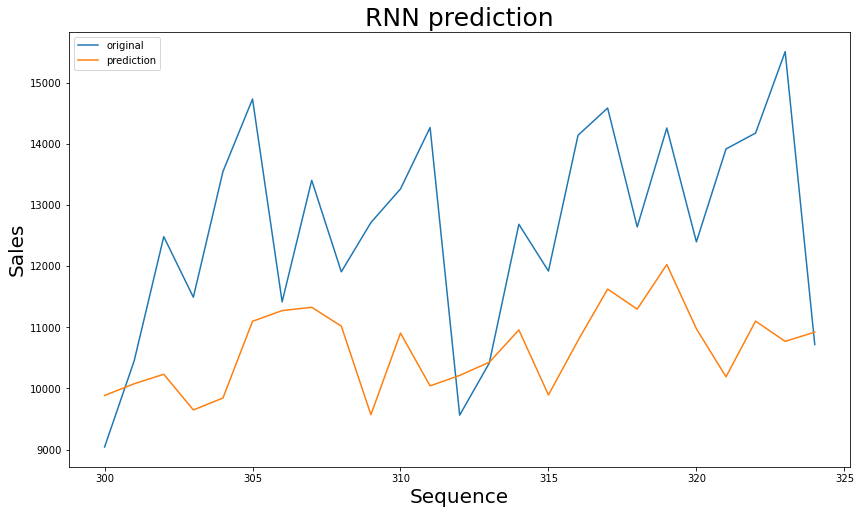

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('RNN prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 21ms/step - loss: 0.3270 - mae: 0.4837


[0.3270481526851654, 0.4836752414703369]